In [2]:
!pip install --upgrade pandas numpy statsmodels scikit-learn matplotlib


  Using cached numpy-1.26.4-cp310-cp310-macosx_11_0_arm64.whl.metadata (61 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.5/159.5 kB 9.7 MB/s eta 0:00:00
  Using cached kiwisolver-1.4.5-cp310-cp310-macosx_11_0_arm64.whl.metadata (6.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 76.5 MB/s eta 0:00:0000:010:01
Using cached numpy-1.26.4-cp310-cp310-macosx_11_0_arm64.whl (14.0 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 90.9 MB/s eta 0:00:00 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 87.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 86.2 MB/s eta 0:00:0000:01:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.8/244.8 kB 18.7 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 68.5 MB/s eta 0:00:00:00:01
Using cached kiwisolver-1.4.5-cp310-cp310-macosx_11_

In [3]:
!pip install --upgrade machine-learning-datasets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.4/35.4 MB 86.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 43.8 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 28.1 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sagemaker 2.203.1 requires urllib3<1.27, but you have urllib3 2.1.0 which is incompatible.

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [43]:
import machine_learning_datasets as mldatasets

In [44]:
import math 
import machine_learning_datasets as mldatasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import seaborn as sns

In [45]:
cvd_df = mldatasets.load("cardiovascular-disease")

https://raw.githubusercontent.com/caravanuden/cardio/master/cardio_train.csv downloaded to /Users/derekdeming/cs_projects/ml-interpretability/data/cardio_train.csv
1 dataset files found in /Users/derekdeming/cs_projects/ml-interpretability/data folder
parsing /Users/derekdeming/cs_projects/ml-interpretability/data/cardio_train.csv


In [46]:
cvd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


In [48]:
cvd_df['age'] =  cvd_df['age'] / 365.24

In [49]:
cvd_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,70000.0,53.304309,6.755152,29.564122,48.36272,53.945351,58.391742,64.924433
gender,70000.0,1.349571,0.476838,1.000000,1.00000,1.000000,2.000000,2.000000
height,70000.0,164.359229,8.210126,55.000000,159.00000,165.000000,170.000000,250.000000
weight,70000.0,74.205690,14.395757,10.000000,65.00000,72.000000,82.000000,200.000000
ap_hi,70000.0,128.817286,154.011419,-150.000000,120.00000,120.000000,140.000000,16020.000000
ap_lo,70000.0,96.630414,188.472530,-70.000000,80.00000,80.000000,90.000000,11000.000000
cholesterol,70000.0,1.366871,0.680250,1.000000,1.00000,1.000000,2.000000,3.000000
gluc,70000.0,1.226457,0.572270,1.000000,1.00000,1.000000,1.000000,3.000000
smoke,70000.0,0.088129,0.283484,0.000000,0.00000,0.000000,0.000000,1.000000
alco,70000.0,0.053771,0.225568,0.000000,0.00000,0.000000,0.000000,1.000000


In [50]:
cvd_df = cvd_df[(cvd_df['ap_lo'] <= 370) & (cvd_df['ap_lo'] > 0)].reset_index(drop=True)
cvd_df = cvd_df[(cvd_df['ap_hi'] <= 370) & (cvd_df['ap_hi'] > 0)].reset_index(drop=True)
cvd_df = cvd_df[cvd_df['ap_hi'] >= cvd_df['ap_lo']].reset_index(drop=True)

In [51]:
incorrect_l = cvd_df[
    (cvd_df['ap_hi'] > 370)
    | (cvd_df['ap_hi'] <= 40)
    | (cvd_df['ap_lo'] > 370)
    | (cvd_df['ap_lo'] <= 40)
].index
print(len(incorrect_l) / cvd_df.shape[0])

0.0007713466548296488


In [52]:
cvd_df.drop(incorrect_l, inplace=True)

In [53]:
cvd_df = cvd_df[cvd_df['ap_hi'] >= cvd_df['ap_lo']].reset_index(drop=True)

In [54]:
y = cvd_df['cardio']
x = cvd_df.drop(columns=['cardio'], axis=1).copy()
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=9)

### Learning about interpretation method types and scopes 

In [58]:
log_model = sm.Logit(y_train, sm.add_constant(X_train))
try:
    log_result = log_model.fit()
    print(log_result.summary2())
except np.linalg.LinAlgError as e:
    print("LinAlgError:", e)

Optimization terminated successfully.
         Current function value: 0.562145
         Iterations 6
                         Results: Logit
Model:              Logit            Method:           MLE       
Dependent Variable: cardio           Pseudo R-squared: 0.189     
Date:               2024-04-21 23:11 AIC:              65636.3972
No. Observations:   58359            BIC:              65744.0896
Df Model:           11               Log-Likelihood:   -32806.   
Df Residuals:       58347            LL-Null:          -40448.   
Converged:          1.0000           LLR p-value:      0.0000    
No. Iterations:     6.0000           Scale:            1.0000    
-----------------------------------------------------------------
               Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
-----------------------------------------------------------------
const         -11.1677   0.2507 -44.5530 0.0000 -11.6590 -10.6764
age             0.0504   0.0015  34.3350 0.0000   0.0475   0.0532


why the exponential? 

well coefficients are the log odds, which are the logarithms of the odds. Odds are the probability of a positive case over the probability of a negative case, where the positive case is the label we are trying to predict 

the exponential function is the inverse of the log, so it can take any log odds and return the odds

In [59]:
np.exp(log_result.params).sort_values(ascending=False)

cholesterol    1.645409
ap_hi          1.057123
age            1.051662
ap_lo          1.011482
weight         1.010800
height         0.996614
gender         0.994480
gluc           0.887356
smoke          0.865710
alco           0.825331
active         0.782065
const          0.000014
dtype: float64

we see the binary categories vary little compared to the continuous variables such as weight, age, ap_hi/lo

In [62]:
np.std(X_train, 0)

age             6.753314
gender          0.476652
height          8.186996
weight         14.331368
ap_hi          16.682047
ap_lo           9.434014
cholesterol     0.678979
gluc            0.570598
smoke           0.283529
alco            0.224476
active          0.396201
dtype: float64

if we take a look at the P > |z| column above. This is the p-value... when it is less than 0.05, we reject the null hyp that states that the coefficients is equal to zero. In other words, the corresponding feature is statistically significant 

however, when its above that number, especially by a large margin, there's no statistical evidence that it affects the predicted score, like the case for gender in the dataset 

now we need to find the features that matter most

one way to do this is by multiplying the coefficients by the std of the features. Incorporating the std accounts for differences in variances between features... so we should better see if gender really is irrelevant 

In [63]:
coefs = log_result.params.drop(labels=['const', 'gender'])
stdv = np.std(X_train, 0).drop(labels='gender')
abs(coefs * stdv).sort_values(ascending=False)

ap_hi          0.926707
age            0.340174
cholesterol    0.338124
weight         0.153945
ap_lo          0.107705
active         0.097393
gluc           0.068192
alco           0.043093
smoke          0.040886
height         0.027770
dtype: float64

the table above can be interpreted as an approximation of risk factors from high to low according to the model 

it is model-specific not model-agnostic 

our feature importance method shows that ap_hi, age, cholesterol, and weight are the parts that impact the whole the most

feature importance is only one of many global modular interpretation methods but arguable the most important one 

-- global holistic interpretation: we can explain how a model makes predictions simply because we can comprehend the entire model at once with a complete understanding of the data and its a trained model 

-- global modular interpreation - in the same way we can explain the role of parts of an internal combustion engine in the whole process of turning fuel into movement, we can also do so with a model 

-- local single-prediction interpretation: the explanation of why a single prediction was made

-- local group-prediction interp: apply the above to a group of predictions 

### Interpreting indiviual preds w/ logistic reg

In [65]:
y_pred = log_result.predict(sm.add_constant(X_test)).to_numpy()
y_pred

array([0.6182222 , 0.33604015, 0.21126989, ..., 0.30789012, 0.26143349,
       0.31372653])

In [66]:
y_pred[2872]

0.3792254083863884

In [67]:
print(X_test.iloc[2872])

age             51.620852
gender           2.000000
height         165.000000
weight          64.000000
ap_hi          120.000000
ap_lo           80.000000
cholesterol      1.000000
gluc             1.000000
smoke            0.000000
alco             0.000000
active           0.000000
Name: 19040, dtype: float64


In [69]:
filler_feature_values = {
    0: 1, 1: 30, 2: 1, 3: 165, 4: 57, 5: 110, 
    6: 70, 7: 1, 8: 1, 9: 0, 10:0, 11:1
}


filler_feature_ranges = {
    0: 1, 1: 35, 2: 2, 3: 110, 4: 150, 5: 140, 
    6: 70, 7: 3, 8: 3, 9: 2, 10:2, 11:2
}

In [70]:
X_highlight = np.reshape(np.concatenate(([1], X_test.iloc[2872].to_numpy())), (1, 12))
X_highlight

array([[  1.        ,  51.62085204,   2.        , 165.        ,
         64.        , 120.        ,  80.        ,   1.        ,
          1.        ,   0.        ,   0.        ,   0.        ]])

In [73]:
from mlxtend.plotting import plot_decision_regions


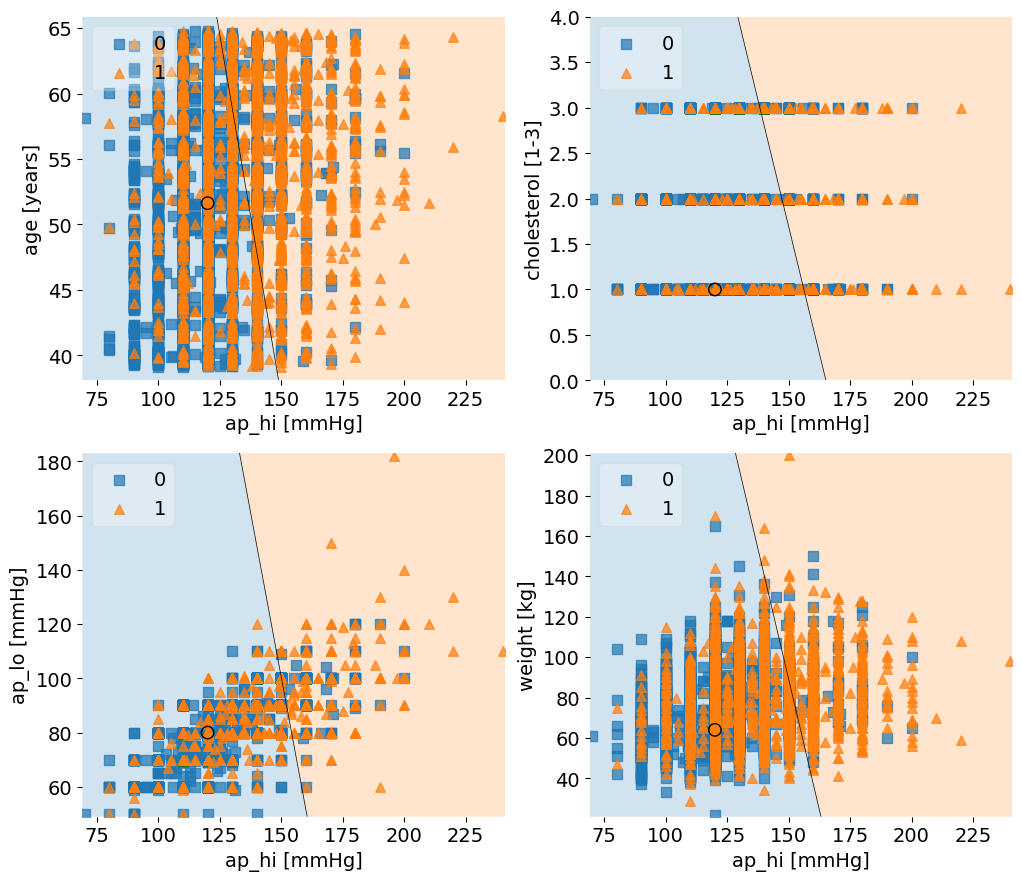

In [74]:
plt.rcParams.update({'font.size': 14})
fig, axarr = plt.subplots(2, 2, figsize=(12, 8), sharex=True, sharey=False)
mldatasets.create_decision_plot(X_test, y_test, log_result, [5, 1], ['ap_hi [mmHg]', 'age [years]'], 
                    X_highlight, filler_feature_values, filler_feature_ranges, ax=axarr.flat[0])
mldatasets.create_decision_plot(X_test, y_test, log_result, [5, 7], ['ap_hi [mmHg]', 'cholesterol [1-3]'], 
                    X_highlight, filler_feature_values, filler_feature_ranges, ax=axarr.flat[1])
mldatasets.create_decision_plot(X_test, y_test, log_result, [5, 6], ['ap_hi [mmHg]', 'ap_lo [mmHg]'], 
                    X_highlight, filler_feature_values, filler_feature_ranges, ax=axarr.flat[2])
mldatasets.create_decision_plot(X_test, y_test, log_result, [5, 4], ['ap_hi [mmHg]', 'weight [kg]'], 
                    X_highlight, filler_feature_values, filler_feature_ranges, ax=axarr.flat[3])
plt.subplots_adjust(top = 1, bottom=0, hspace=0.2, wspace=0.2)
plt.show()